In [1]:
# Phase 3: Cluster Insights and Business Recommendations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)

# Load RFM data with cluster labels
rfm = pd.read_csv("../data/rfm_with_clusters.csv")

print("RFM with clusters loaded. Shape:", rfm.shape)
rfm.head()


RFM with clusters loaded. Shape: (4718, 5)


,customerno,recency,frequency,monetary,cluster
0,12004.0,228,1,1509.60,1
1,12006.0,219,1,24.76,1
2,12008.0,277,1,5689.57,1
3,12013.0,360,1,69.96,1
4,12024.0,177,1,149.52,1


In [2]:
#Compute KPIs for each cluster

# Calculate total revenue to compute revenue share later
total_revenue = rfm["monetary"].sum()

# Compute core metrics per cluster
cluster_kpis = (
    rfm.groupby("cluster")
      .agg(
          customers=("cluster", "size"),
          avg_recency=("recency", "mean"),
          avg_frequency=("frequency", "mean"),
          avg_monetary=("monetary", "mean"),
          total_revenue=("monetary", "sum")
      )
      .assign(
          revenue_share=lambda d: 100 * d["total_revenue"] / total_revenue,
          avg_order_value=lambda d: d["avg_monetary"] / (d["avg_frequency"] + 1e-9)
      )
      .round(2)
      .sort_values("revenue_share", ascending=False)
)

print("Cluster-level KPIs calculated successfully.")
cluster_kpis


Cluster-level KPIs calculated successfully.


,customers,avg_recency,avg_frequency,avg_monetary,total_revenue,revenue_share,avg_order_value
cluster,,,,,,,
2,932,15.55,12.11,43338.15,40391154.02,64.15,3579.51
3,1408,97.49,3.25,11777.30,16582435.55,26.34,3622.99
0,969,20.18,2.27,3674.57,3560654.16,5.65,1618.48
1,1409,203.20,1.23,1725.80,2431648.61,3.86,1407.20


In [3]:
#Interpret and label clusters

# Define basic interpretation rules
def label_cluster(row):
    if row["avg_recency"] < 30 and row["avg_frequency"] > 10 and row["avg_monetary"] > 20000:
        return "High-Value Active Customers"
    elif row["avg_recency"] < 60 and row["avg_frequency"] >= 3:
        return "Loyal Customers"
    elif row["avg_recency"] < 120 and row["avg_frequency"] <= 3:
        return "At-Risk or Occasional Buyers"
    else:
        return "Lost or Inactive Customers"

# Apply labeling
cluster_kpis["segment_label"] = cluster_kpis.apply(label_cluster, axis=1)

# Reorder columns for clarity
cluster_kpis = cluster_kpis[
    ["customers", "avg_recency", "avg_frequency", "avg_monetary", 
     "revenue_share", "avg_order_value", "segment_label"]
]

print("Cluster labeling completed.\n")
cluster_kpis


Cluster labeling completed.



,customers,avg_recency,avg_frequency,avg_monetary,revenue_share,avg_order_value,segment_label
cluster,,,,,,,
2,932,15.55,12.11,43338.15,64.15,3579.51,High-Value Active Customers
3,1408,97.49,3.25,11777.30,26.34,3622.99,Lost or Inactive Customers
0,969,20.18,2.27,3674.57,5.65,1618.48,At-Risk or Occasional Buyers
1,1409,203.20,1.23,1725.80,3.86,1407.20,Lost or Inactive Customers


C:\Users\Mehrshad\AppData\Local\Temp\ipykernel_26736\2319603464.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_kpis.index, y="avg_recency", data=cluster_kpis, ax=axes[0], palette="crest")
C:\Users\Mehrshad\AppData\Local\Temp\ipykernel_26736\2319603464.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_kpis.index, y="avg_frequency", data=cluster_kpis, ax=axes[1], palette="flare")
C:\Users\Mehrshad\AppData\Local\Temp\ipykernel_26736\2319603464.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_kpis.index,

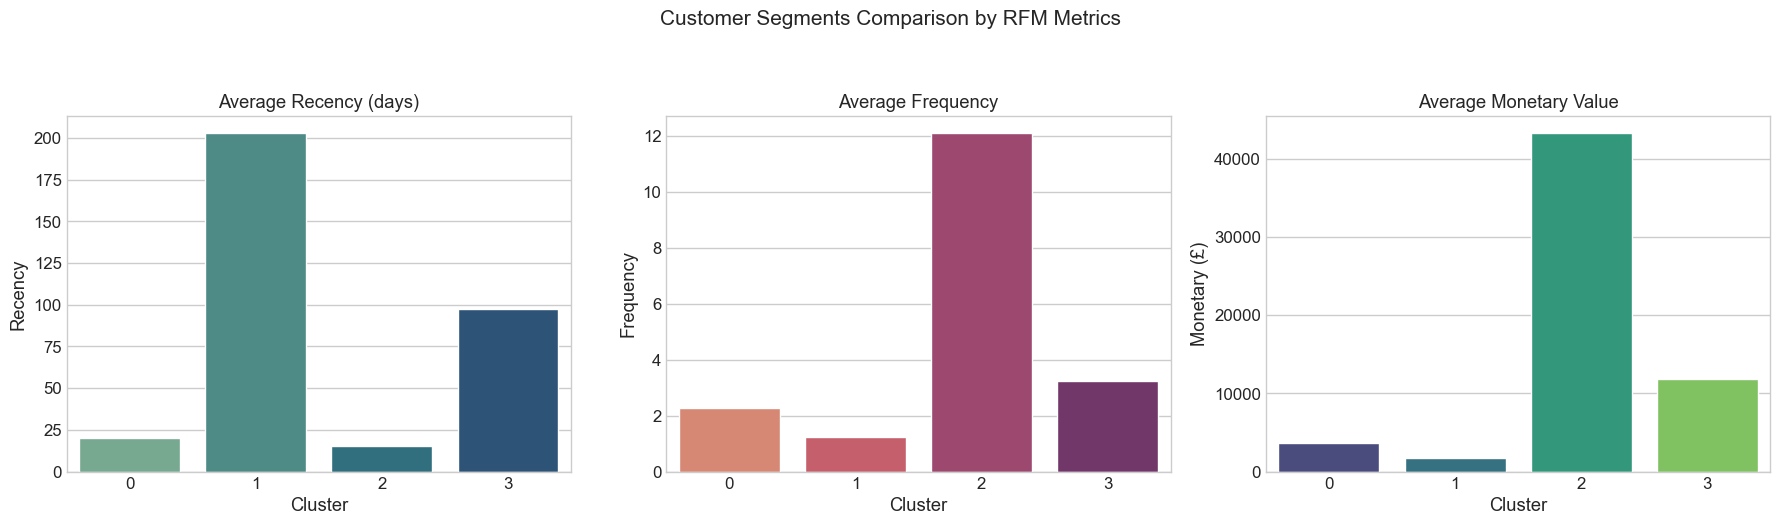

In [5]:
#Visualization of Cluster Insights
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency comparison
sns.barplot(x=cluster_kpis.index, y="avg_recency", data=cluster_kpis, ax=axes[0], palette="crest")
axes[0].set_title("Average Recency (days)")
axes[0].set_xlabel("Cluster")
axes[0].set_ylabel("Recency")

# Frequency comparison
sns.barplot(x=cluster_kpis.index, y="avg_frequency", data=cluster_kpis, ax=axes[1], palette="flare")
axes[1].set_title("Average Frequency")
axes[1].set_xlabel("Cluster")
axes[1].set_ylabel("Frequency")

# Monetary comparison
sns.barplot(x=cluster_kpis.index, y="avg_monetary", data=cluster_kpis, ax=axes[2], palette="viridis")
axes[2].set_title("Average Monetary Value")
axes[2].set_xlabel("Cluster")
axes[2].set_ylabel("Monetary (£)")

plt.suptitle("Customer Segments Comparison by RFM Metrics", fontsize=15, y=1.05)
plt.tight_layout()
plt.show()


## Phase 3 – Cluster Insights Summary

Based on the RFM-based clustering, we identified four distinct customer segments:

**High-Value Active Customers (Cluster 2)**: Very recent, very frequent, and extremely high monetary value; responsible for the majority of total revenue.
**Loyal Customers (Cluster 3)**: Regular buyers with moderate frequency and strong spending; important for stable revenue.
**At-Risk or Occasional Buyers (Cluster 0)**: More recent than fully lost customers but with low frequency and limited monetary value.
**Lost or Inactive Customers (Cluster 1)**: Long time since last purchase, very low frequency and spend; primary target for win-back or can be deprioritized.

These insights will be used in Phase 4 to design targeted marketing strategies for each segment.
